<a href="https://colab.research.google.com/github/mitali-g/MachineLearning/blob/master/Chest_Xray_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential 
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Reshape
from keras.utils import np_utils
import os, cv2, random
import pandas as pd
%matplotlib inline

Using TensorFlow backend.


In [ ]:
!ls Resized_Dataset/train-resized|wc

   5309    5309  137840


In [ ]:
#!rm -r Resized_Dataset __MACOSX/

In [ ]:
!ls -ltr
!date

total 1494060
-rw-r--r-- 1 root root     314074 Mar 20 01:27 Chest_xray_Corona_Metadata.csv
-rw-r--r-- 1 root root        252 Mar 20 01:27 Chest_xray_Corona_dataset_Summary.csv
drwxr-xr-x 1 root root       4096 Jun 26 16:26 sample_data
drwx------ 4 root root       4096 Jul  7 16:58 drive
-rw-r--r-- 1 root root       2671 Jul  7 16:58 adc.json
-rw-r--r-- 1 root root         64 Jul  7 17:00 kaggle.json
-rw-r--r-- 1 root root 1275680348 Jul  7 17:00 CoronaHack-Chest-XRaydataset.zip
drwxr-xr-x 4 root root       4096 Jul  7 17:27 Coronahack-Chest-XRay-Dataset
-rw-r--r-- 1 root root  253890139 Jul  7 21:05 Resized_Dataset.zip
Tue Jul  7 21:11:46 UTC 2020


In [ ]:
!unzip Resized_Dataset.zip

In [ ]:
# !pip install kaggle

In [ ]:
# from googleapiclient.discovery import build
# import io, os
# from googleapiclient.http import MediaIoBaseDownload
# from google.colab import auth
# auth.authenticate_user()
# drive_service = build('drive', 'v3')
# results = drive_service.files().list(
#     q="name = 'kaggle.json'", fields="files(id)").execute()
# kaggle_api_key = results.get('files', [])
# # print(kaggle_api_key)
# filename = "/content/.kaggle/kaggle.json"
# os.makedirs(os.path.dirname(filename), exist_ok=True)
# os.listdir("/content/.kaggle")
# request = drive_service.files().get_media(fileId=kaggle_api_key[0]['id'])
# fh = io.FileIO(filename, 'wb')
# downloader = MediaIoBaseDownload(fh, request)
# done = False
# while done is False:
#     status, done = downloader.next_chunk()
#     print("Download %d%%." % int(status.progress() * 100))
# os.chmod(filename, 600)

Download 100%.


In [ ]:
# !mkdir -p ~/.kaggle
# # create api token and copy into colab
# !cp kaggle.json ~/.kaggle/
# !chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# !kaggle datasets download -d praveengovi/CoronaHack-Chest-XRaydataset

 99% 1.18G/1.19G [00:08<00:00, 169MB/s]
100% 1.19G/1.19G [00:08<00:00, 158MB/s]


In [ ]:
!ls

adc.json			       CoronaHack-Chest-XRaydataset.zip
Chest_xray_Corona_dataset_Summary.csv  drive
Chest_xray_Corona_Metadata.csv	       kaggle.json
Coronahack-Chest-XRay-Dataset	       sample_data


In [ ]:
# !unzip -q CoronaHack-Chest-XRaydataset.zip 
# !unzip -q CoronaHack-Chest-XRaydataset.zip

replace Chest_xray_Corona_Metadata.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
# from tensorflow.keras.preprocessing import image
# import os
# import numpy as np
# import scipy
# import skimage
# from PIL import Image
# import os, sys

# path = "Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train/"
# # manually create train-resized folder
# outpath = "Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train-resized/"

# dirs = os.listdir( path )

# def resize():
#     ctr = 0
#     for item in dirs:
#         if ctr % 100 == 0:
#     	    print(ctr)
#         if item[0] == '.':
#     	    continue
#         if os.path.isfile(path+item):
#             im = Image.open(path+item).convert('LA')
#             f, e = os.path.splitext(outpath+item)
#             imResize = im.resize((256,256), Image.ANTIALIAS)
#             imResize.save(f + '.png', 'PNG', quality=90)
#             ctr += 1

# resize()

In [ ]:
# from PIL import Image
# import os, sys

# path = "Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/test/"
# # manually create test-resized folder
# outpath = "Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/test-resized/"

# dirs = os.listdir( path )

# def resize():
#     ctr = 0
#     for item in dirs:
#         if ctr % 100 == 0:
#     	    print(ctr)
#         if item[0] == '.':
#     	    continue
#         if os.path.isfile(path+item):
#             im = Image.open(path+item).convert('LA')
#             f, e = os.path.splitext(outpath+item)
#             imResize = im.resize((256,256), Image.ANTIALIAS)
#             imResize.save(f + '.png', 'PNG', quality=90)
#             ctr += 1

# resize()

0
100
200
300
400
500
600


In [ ]:
 !ls

adc.json			       kaggle.json
Chest_xray_Corona_dataset_Summary.csv  __MACOSX
Chest_xray_Corona_Metadata.csv	       Resized_Dataset
Coronahack-Chest-XRay-Dataset	       Resized_Dataset.zip
CoronaHack-Chest-XRaydataset.zip       sample_data
drive


In [5]:
dataset = pd.read_csv("Resized_Dataset/Chest_xray_Corona_Metadata.csv")
print(dataset.shape)
dataset.head(5932)

(5910, 6)


,Unnamed: 0,X_ray_image_name,Label,Dataset_type,Label_2_Virus_category,Label_1_Virus_category
0,0,IM-0128-0001.jpeg,Normal,TRAIN,NaN,NaN
1,1,IM-0127-0001.jpeg,Normal,TRAIN,NaN,NaN
2,2,IM-0125-0001.jpeg,Normal,TRAIN,NaN,NaN
3,3,IM-0122-0001.jpeg,Normal,TRAIN,NaN,NaN
4,4,IM-0119-0001.jpeg,Normal,TRAIN,NaN,NaN
...,...,...,...,...,...,...
5905,5928,person1637_virus_2834.jpeg,Pnemonia,TEST,NaN,Virus
5906,5929,person1635_virus_2831.jpeg,Pnemonia,TEST,NaN,Virus
5907,5930,person1634_virus_2830.jpeg,Pnemonia,TEST,NaN,Virus
5908,5931,person1633_virus_2829.jpeg,Pnemonia,TEST,NaN,Virus


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


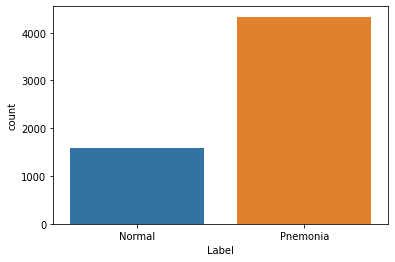

In [6]:
import seaborn as sns
sns.countplot(dataset['Label'])

In [7]:
dataset['X_ray_image_name']

0                IM-0128-0001.jpeg
1                IM-0127-0001.jpeg
2                IM-0125-0001.jpeg
3                IM-0122-0001.jpeg
4                IM-0119-0001.jpeg
                   ...            
5905    person1637_virus_2834.jpeg
5906    person1635_virus_2831.jpeg
5907    person1634_virus_2830.jpeg
5908    person1633_virus_2829.jpeg
5909    person1632_virus_2827.jpeg
Name: X_ray_image_name, Length: 5910, dtype: object

In [8]:
dataset[['X_ray_image_name', 'Label']]

,X_ray_image_name,Label
0,IM-0128-0001.jpeg,Normal
1,IM-0127-0001.jpeg,Normal
2,IM-0125-0001.jpeg,Normal
3,IM-0122-0001.jpeg,Normal
4,IM-0119-0001.jpeg,Normal
...,...,...
5905,person1637_virus_2834.jpeg,Pnemonia
5906,person1635_virus_2831.jpeg,Pnemonia
5907,person1634_virus_2830.jpeg,Pnemonia
5908,person1633_virus_2829.jpeg,Pnemonia


In [9]:
x_train = dataset[['X_ray_image_name']]
x_train = x_train[0:5309]
print(x_train)



               X_ray_image_name
0             IM-0128-0001.jpeg
1             IM-0127-0001.jpeg
2             IM-0125-0001.jpeg
3             IM-0122-0001.jpeg
4             IM-0119-0001.jpeg
...                         ...
5304  NORMAL2-IM-0066-0001.jpeg
5305  NORMAL2-IM-0060-0001.jpeg
5306  NORMAL2-IM-0059-0001.jpeg
5307  NORMAL2-IM-0058-0001.jpeg
5308  NORMAL2-IM-0052-0001.jpeg

[5309 rows x 1 columns]


In [10]:
y_train_labels = dataset[['Label']]
y_train_labels = y_train_labels[0:5309]
#print(y_train_labels)

y_train = []
for label in y_train_labels['Label']:
  if label == 'Pnemonia':
    y_train.append(1)
  elif label == 'Normal':
    y_train.append(0)
  else:
    print(label)
#print(y_train)
y_train = keras.utils.to_categorical(y_train)
print(y_train)

[[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [11]:
x_testFeatures = dataset[['X_ray_image_name']]
x_testFeatures = x_testFeatures[5309:]
print(x_testFeatures)

                X_ray_image_name
5309   NORMAL2-IM-0051-0001.jpeg
5310   NORMAL2-IM-0045-0001.jpeg
5311   NORMAL2-IM-0041-0001.jpeg
5312   NORMAL2-IM-0035-0001.jpeg
5313   NORMAL2-IM-0033-0001.jpeg
...                          ...
5905  person1637_virus_2834.jpeg
5906  person1635_virus_2831.jpeg
5907  person1634_virus_2830.jpeg
5908  person1633_virus_2829.jpeg
5909  person1632_virus_2827.jpeg

[601 rows x 1 columns]


In [12]:
y_test_labels = dataset[['Label']]
y_test_labels = y_test_labels[5309:]
#print(y_test_labels)

y_test = []
for label in y_test_labels['Label']:
  if label == 'Pnemonia':
    y_test.append(1)
  elif label == 'Normal':
    y_test.append(0)
  else:
    print(label)
#print(y_test)
y_test = keras.utils.to_categorical(y_test)
print(y_test)

[[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [0. 1.]
 [0. 1.]
 [0. 1.]]


In [13]:
os.listdir()

['.config',
 'Resized_Dataset',
 'Resized_Dataset.zip',
 'drive',
 '__MACOSX',
 'sample_data']

In [14]:
#for image in os.listdir('Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train'):
  #image = plt.imread('Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train/' + image)
  #plt.grid(False)
  #plt.imshow(image)
  #plt.show()

In [15]:
import os
list_of_images = os.listdir('Resized_Dataset/train-resized')
len(list_of_images)

5309

5309

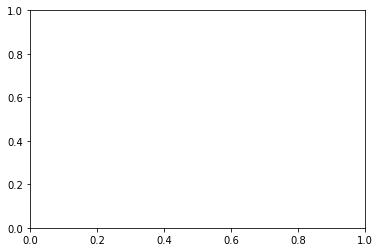

In [19]:
x_train = []
list_of_images = os.listdir('Resized_Dataset/train-resized')
for image in list_of_images:
  image = plt.imread('Resized_Dataset/train-resized/' + image)
  plt.grid(False)
  x_train.append(image)
len(x_train)

601

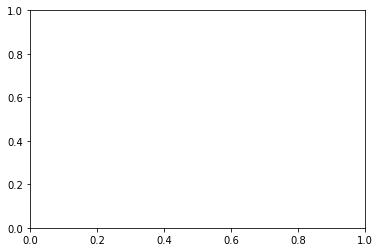

In [17]:
x_test = []
#for image in os.listdir('Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/test-resized'):
 # image = plt.imread('Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/test-resized/' + image)
 # plt.grid(False)
 # x_test.append(image)
#len(x_test)

test_path = ('Resized_Dataset/test-resized/')

for image in x_testFeatures['X_ray_image_name']:
  # image.rfind : removes '.jpeg'
  image_path =test_path + image[:image.rfind('.jpeg')]


  if os.path.isfile(image_path + '.png'):
    image = plt.imread(image_path + '.png')
    plt.grid(False)
    x_test.append(image)
len(x_test)

In [20]:
x_train = np.array(x_train, np.float16) / 255.0
y_train = np.array(y_train)
print(len(x_train), len(y_train), x_train.shape, y_train.shape)

x_test = np.array(x_test, np.float16) / 255.0
y_test = np.array(y_test)
print(len(x_test), len(y_test), x_test.shape, y_test.shape)

5309 5309 (5309, 256, 256, 4) (5309, 2)
601 601 (601, 256, 256, 4) (601, 2)


In [ ]:
#plt.imshow(x_train[100])

#x_train[0].shape

#gray_image = plt.imshow(x_train[0], cmap = 'gray')
#len(x_train[0].shape)

In [ ]:
print(y_train.shape)
print(y_test.shape)

(5309, 2)
(601, 2)


In [ ]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation = 'relu', input_shape = (256, 256, 4)))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(64, (3,3), activation = 'relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64, (3, 3), activation = 'relu'))

model.add(Flatten())

model.add(Dense(64, activation = 'relu'))
model.add(Dense(2))
model.summary()



Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 254, 254, 32)      1184      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 125, 125, 64)      18496     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 62, 62, 64)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 60, 60, 64)        36928     
_________________________________________________________________
flatten_7 (Flatten)          (None, 230400)            0         
_________________________________________________________________
dense_13 (Dense)             (None, 64)               

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
history = model.fit(x_train, y_train, epochs = 10, validation_split = 0.1)

Train on 4778 samples, validate on 531 samples
Epoch 1/10
4778/4778 [==============================] - 508s 106ms/step - loss: 0.5940 - accuracy: 0.2807 - val_loss: 0.3688 - val_accuracy: 0.0452
Epoch 2/10
4778/4778 [==============================] - 506s 106ms/step - loss: 0.5944 - accuracy: 0.2807 - val_loss: 0.3855 - val_accuracy: 0.0452
Epoch 3/10
4778/4778 [==============================] - 507s 106ms/step - loss: 0.5936 - accuracy: 0.2807 - val_loss: 0.3552 - val_accuracy: 0.0452
Epoch 4/10
4778/4778 [==============================] - 508s 106ms/step - loss: 0.5944 - accuracy: 0.2807 - val_loss: 0.3785 - val_accuracy: 0.0452
Epoch 5/10
4778/4778 [==============================] - 507s 106ms/step - loss: 0.5942 - accuracy: 0.2807 - val_loss: 0.3776 - val_accuracy: 0.0452
Epoch 6/10
4778/4778 [==============================] - 506s 106ms/step - loss: 0.5943 - accuracy: 0.2807 - val_loss: 0.3714 - val_accuracy: 0.0452
Epoch 7/10
4778/4778 [==============================] - 506s 106m

601/601 [==============================] - 18s 29ms/step
0.6604057664978326 0.351081520318985


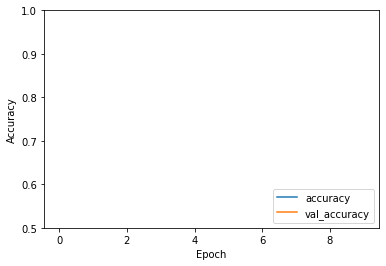

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(x_test,  y_test)
print(test_loss, test_acc)